In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import urllib.request
from adjustText import adjust_text
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

In [2]:
comunidades={'Andalucía':8426405,
 'Aragón':1320794,
 'Asturias':1022293,
 'Cantabria':581684,
 'Ceuta':84843,
 'Castilla y Leon':2408083,
 'Castilla La Mancha':2035505,
 'Canarias':2207225,
 'Cataluña':7565099,
 'Extremadura':1065371,
 'Galicia':2700330,
 'Baleares':1187802,
 'Murcia':1487698,
 'Madrid':6640705,
 'Melilla':84714,
 'Navarra':649966,
 'País Vasco':2178048,
 'La Rioja':313582,
 'C. Valenciana':4974475}

In [3]:
pob_spain=0
for i in comunidades.keys():
    pob_spain+=comunidades[i]
comunidades['España']=pob_spain

In [4]:
datos_row = pd.read_csv('csv/estado_vacunacion_.csv')

In [5]:
dia = '3/2/21' # dia del informe

<ipython-input-6-7554b2ef0cba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
<ipython-input-6-7554b2ef0cba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['vacunas_poblacion']=datos['Dosis administradas']/datos['poblacion']


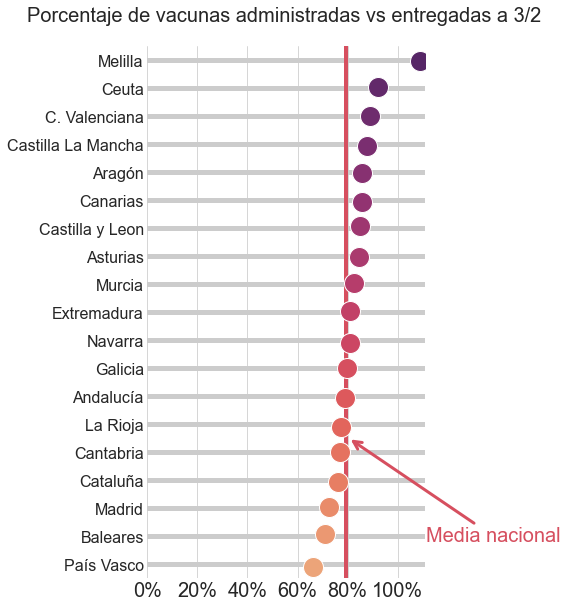

In [6]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title = 'Porcentaje de vacunas administradas vs entregadas a {}'.format(dia[:-3])
datos=datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['vacunas_poblacion']=datos['Dosis administradas']/datos['poblacion']

colores = sns.color_palette("flare_r",19)
media = datos['Dosis administradas'].sum()/datos['Dosis entregadas'].sum()

mas_cercano =  abs(datos['% sobre entregadas']-media).idxmin()
indice_color_media = datos.sort_values('% sobre entregadas',ascending=False).index.get_loc(mas_cercano)
color_media = colores[indice_color_media]

g = sns.PairGrid(datos.sort_values('% sobre entregadas',ascending=False),
                 x_vars='% sobre entregadas', y_vars=["ccaa"],
                 height=8, aspect=1)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=20, orient="h", jitter=True,
      palette=colores,linewidth=1,edgecolor='white')

# Use the same x axis limits on all columns and add better labels
#g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
          "Not distracted crashes", "No previous crashes"]

ax = g.axes.flat[0]
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.0f}%'.format(v*100)))
#ax.set_title(label=title,fontsize=20)
ax.xaxis.grid(True)
ax.yaxis.grid(True,lw=5)
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=20,width=0,rotation=0,pad=0)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
y_min,y_max = ax.get_ylim()

#ax.vlines(media,y_min,y_max*.7,color='navy')
ax.axvline(x=media,lw=4,color=color_media)
ax.set_xlabel('')
ax.set_ylabel('')
ax.annotate('Media nacional', xy=(media+.01,13.5), va='center', xytext=(media*1.4,17),
            arrowprops=dict(arrowstyle="->",color=color_media,lw=3),
            fontsize=20,color=color_media)
#ax.set_title(label=title,fontsize=20)
g.fig.suptitle(title,fontsize=20,y=1.05)
sns.despine(left=True, bottom=True)

#g.fig.subplots_adjust(top=1,bottom=.05) 
g.fig.tight_layout()

g.fig.savefig('graficos/estado_vacunas_comunidad.png',bbox_inches = 'tight',dpi=144)

<ipython-input-7-5b2c107d3fed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
<ipython-input-7-5b2c107d3fed>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['vacunas_poblacion']=datos['Dosis administradas']/datos['poblacion']


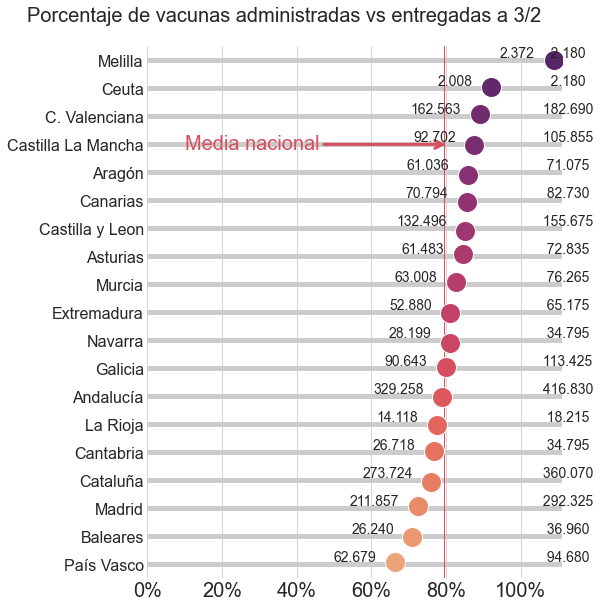

In [7]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title = 'Porcentaje de vacunas administradas vs entregadas a {}'.format(dia[:-3])
datos=datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['vacunas_poblacion']=datos['Dosis administradas']/datos['poblacion']

colores = sns.color_palette("flare_r",19)
media = datos['Dosis administradas'].sum()/datos['Dosis entregadas'].sum()

mas_cercano =  abs(datos['% sobre entregadas']-media).idxmin()
indice_color_media = datos.sort_values('% sobre entregadas',ascending=False).index.get_loc(mas_cercano)
color_media = colores[indice_color_media]

g = sns.PairGrid(datos.sort_values('% sobre entregadas',ascending=False),
                 x_vars='% sobre entregadas', y_vars=["ccaa"],
                 height=8, aspect=1)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=20, orient="h", jitter=True,
      palette=colores,linewidth=1,edgecolor='white')



# Use the same x axis limits on all columns and add better labels
#g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
          "Not distracted crashes", "No previous crashes"]

ax = g.axes.flat[0]
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.0f}%'.format(v*100)))
#ax.set_title(label=title,fontsize=20)
ax.xaxis.grid(True)
ax.yaxis.grid(True,lw=5)
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=20,width=0,rotation=0,pad=0)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
y_min,y_max = ax.get_ylim()



#ax.vlines(media,y_min,y_max*.7,color='navy')
ax.axvline(x=media,lw=1,color=color_media)
ax.set_xlabel('')
ax.set_ylabel('')
ax.annotate('Media nacional', xy=(media+.01,3), va='center', 
            xytext=(0.1,3),
            arrowprops=dict(arrowstyle="->",color=color_media,lw=3),
            fontsize=20,color=color_media)
#ax.set_title(label=title,fontsize=20)


g.fig.suptitle(title,fontsize=20,y=1.05)
sns.despine(left=True, bottom=True)

#g.fig.subplots_adjust(top=1,bottom=.05) 
g.fig.tight_layout()

ticks_y = ax.get_yticklabels()
for j,i in enumerate(ticks_y):
    #print (i,j.get_position()[0],j.get_position()[1])
    ax.text(s='{:,.0f}'.format(datos.loc[datos['ccaa']==i.get_text(),'Dosis administradas'].values[0]).replace(',','.'), 
            x=datos.loc[datos['ccaa']==i.get_text(),'% sobre entregadas']-0.05,
            y=i.get_position()[1]-.1,
            horizontalalignment='right',
           fontsize=14)
    ax.text(s='{:>8,d}'.format(datos.loc[datos['ccaa']==i.get_text(),'Dosis entregadas'].values[0]).replace(',','.'), 
            x=1+.05,
            y=i.get_position()[1]-.1,
            fontsize=14)


g.fig.savefig('graficos/estado_vacunas_comunidad_connumeros.png',bbox_inches = 'tight',dpi=144)

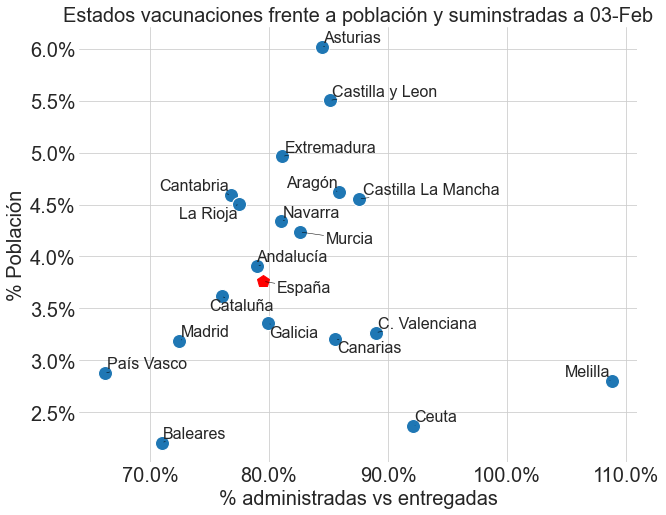

In [8]:
datos = datos_row.copy()

datos=datos.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]

datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['vacunas_poblacion']=datos['Dosis administradas']/datos['poblacion']
today=datetime.today().strftime('%d-%b')

admin_entregadas = datos['Dosis administradas'].sum()/datos['Dosis entregadas'].sum()
vacunas_poblacion = datos['Dosis administradas'].sum()/datos['poblacion'].sum()


sns.set_style(style="white")
fig, ax = plt.subplots(figsize=(10, 8))    
palette = sns.color_palette("bright", 6)
sns.scatterplot(ax=ax, x='% sobre entregadas', y='vacunas_poblacion',
                data=datos, 
                marker='o', 
                s=200, 
                palette="muted")

ax.yaxis.set_tick_params(labelsize=20,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=20,width=0,rotation=0,pad=0)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.1%}'.format(v)))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.1%}'.format(v)))

lista_texto=[]
for i in datos.index:
    texto=plt.text(datos.loc[i,'% sobre entregadas'],
                             datos.loc[i,'vacunas_poblacion'],
                             s=str(datos.loc[i,'ccaa']),
                             ha='center',fontsize=16)
    lista_texto.append(texto)
    
ax.plot(admin_entregadas,vacunas_poblacion, 
                marker='p',markersize=12,color='red')
    
texto=plt.text(admin_entregadas,vacunas_poblacion,
               s='España',ha='center',fontsize=16)
lista_texto.append(texto)   
ax.set_xlabel('% administradas vs entregadas',fontsize=20)
ax.set_ylabel('% Población',fontsize=20)

ax.grid(True)
ax.set_title('Estados vacunaciones frente a población y suminstradas a {}'.format(today),fontsize=20)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)
adjust_text(lista_texto,arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
fig.savefig('graficos/estado_suministradas_poblacion_{}{}'.format(today,'.png'),dpi=144)
#plt.show()


Ciclos terminados..

<ipython-input-9-226e164f072e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
<ipython-input-9-226e164f072e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['pauta_poblacion']=100000*datos['Total pauta completada']/datos['poblacion']


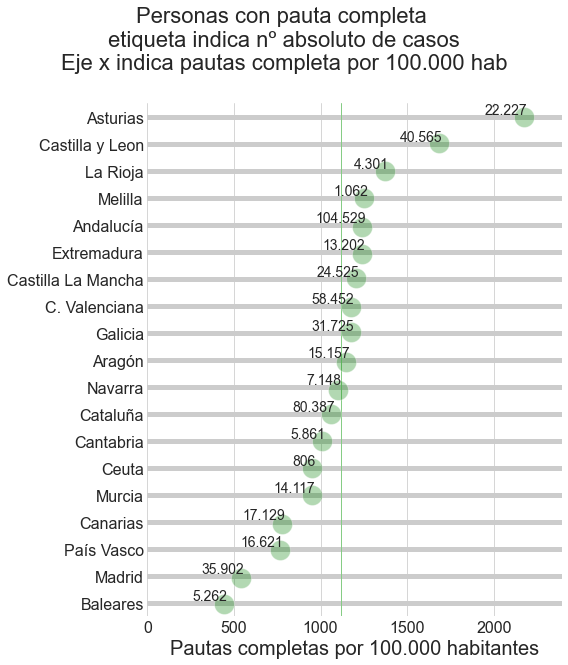

In [9]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title = 'Nº de personas con pauta completa a {}\n linea vertical -> media España'.format(dia[:-3])
title= 'Personas con pauta completa \n etiqueta indica nº absoluto de casos \nEje x indica pautas completa por 100.000 hab'
datos=datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['pauta_poblacion']=100000*datos['Total pauta completada']/datos['poblacion']

colores = sns.color_palette("Greens_r",19)
media = datos['pauta_poblacion'].mean()
mas_cercano =  abs(datos['pauta_poblacion']-media).idxmin()
indice_color_media = datos.sort_values('pauta_poblacion',ascending=False).index.get_loc(mas_cercano)
color_media = colores[indice_color_media]

g = sns.PairGrid(datos.sort_values('pauta_poblacion',ascending=False),
                 x_vars='pauta_poblacion', y_vars=["ccaa"],
                 height=8, aspect=1)

# Draw a dot plot using the stripplot function
#g.map(sns.stripplot, size=20, orient="h", jitter=True,
#      palette=colores,linewidth=1,edgecolor='white',alpha=.5)
g.map(sns.stripplot, size=20, orient="h", jitter=True,
      color='green',linewidth=1,edgecolor='white',alpha=.3)


# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, datos['pauta_poblacion'].max()*1.1), xlabel="", ylabel="")

ax = g.axes.flat[0]
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.0f}'.format(v)))
#ax.set_title(label=title,fontsize=20)
ax.xaxis.grid(True)
ax.yaxis.grid(True,lw=5)
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
#ax.set_xticks([0,0.01,0.02,0.02,0.8,1.0])

y_min,y_max = ax.get_ylim()



#ax.vlines(media,y_min,y_max*.7,color='navy')
ax.axvline(x=media,lw=1,color=color_media)
ax.set_xlabel('Pautas completas por 100.000 habitantes',fontsize=20)
ax.set_ylabel('')
#ax.annotate('Media nacional', xy=(media+.01,10), va='center', 
#            xytext=(0.1,10),
#            arrowprops=dict(arrowstyle="->",color=color_media,lw=3),
#            fontsize=20,color=color_media)
#ax.set_title(label=title,fontsize=20)


g.fig.suptitle(title,fontsize=22,y=1.15)
sns.despine(left=True, bottom=True)

#g.fig.subplots_adjust(top=1,bottom=.05) 
g.fig.tight_layout()

ticks_y = ax.get_yticklabels()
for j,i in enumerate(ticks_y):
    #print (i,j.get_position()[0],j.get_position()[1])
    valor='{:,.0f}'.format(datos.loc[datos['ccaa']==i.get_text(),'Total pauta completada'].values[0])
    if valor!='0':
        ax.text(s=valor.replace(',','.'), 
                x=datos.loc[datos['ccaa']==i.get_text(),'pauta_poblacion']+20,
                y=i.get_position()[1]-.1,
                horizontalalignment='right',
                fontsize=14)


g.fig.savefig('graficos/estado_pautas_comunidad_{}{}'.format(today,'.png'),bbox_inches = 'tight',dpi=144)

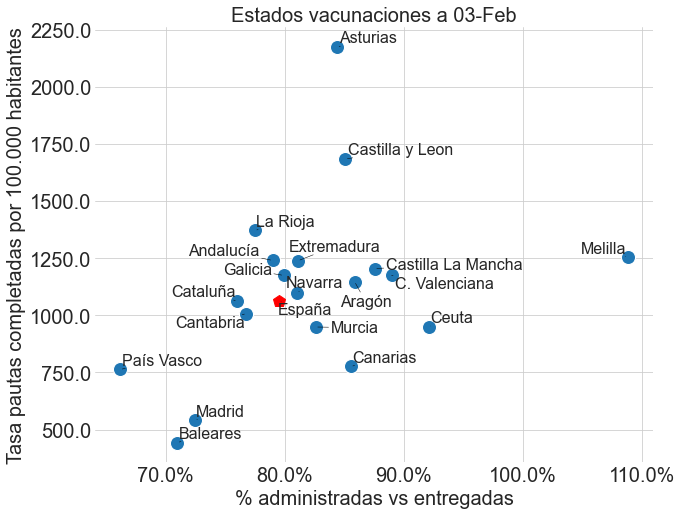

In [10]:
datos = datos_row.copy()

datos=datos.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]

datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['vacunas_poblacion']=datos['Dosis administradas']/datos['poblacion']
today=datetime.today().strftime('%d-%b')

datos['pauta_poblacion']=100000*datos['Total pauta completada']/datos['poblacion']


admin_entregadas = datos['Dosis administradas'].sum()/datos['Dosis entregadas'].sum()
pauta_espanna = datos['Total pauta completada'].sum()/datos['poblacion'].sum()*100000


sns.set_style(style="white")
fig, ax = plt.subplots(figsize=(10, 8))    
palette = sns.color_palette("bright", 6)
sns.scatterplot(ax=ax, x='% sobre entregadas', y='pauta_poblacion',
                data=datos, 
                marker='o', 
                s=200, 
                palette="muted")

ax.yaxis.set_tick_params(labelsize=20,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=20,width=0,rotation=0,pad=0)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.1f}'.format(v)))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.1%}'.format(v)))

lista_texto=[]
for i in datos.index:
    texto=plt.text(datos.loc[i,'% sobre entregadas'],
                             datos.loc[i,'pauta_poblacion'],
                             s=str(datos.loc[i,'ccaa']),
                             ha='center',fontsize=16)
    lista_texto.append(texto)
    
ax.plot(admin_entregadas,pauta_espanna, 
                marker='p',markersize=12,color='red')
    
texto=plt.text(admin_entregadas,pauta_espanna,
               s='España',ha='center',fontsize=16)
lista_texto.append(texto)   
ax.set_xlabel('% administradas vs entregadas',fontsize=20)
ax.set_ylabel('Tasa pautas completadas por 100.000 habitantes',fontsize=20)

ax.grid(True)
ax.set_title('Estados vacunaciones a {}'.format(today),fontsize=20)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)
adjust_text(lista_texto,arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
fig.savefig('graficos/estado_suministradas_poblacion_{}{}'.format(today,'.png'),dpi=144)
#plt.show()


# Vacunas por poblacion

In [11]:
datos

,date_pub,ccaa,Dosis entregadas Pfizer,Dosis entregadas Moderna,Dosis entregadas,Dosis administradas,% sobre entregadas,Total pauta completada,Última fecha de actualización de datos,Fecha de la ultima vacuna registrada,source_name,source,poblacion,vacunas_poblacion,pauta_poblacion
420,3/2/21,Andalucía,400230.0,16600.0,416830,329258,0.789910,104529.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,8426405,0.039075,1240.493425
421,3/2/21,Aragón,68175.0,2900.0,71075,61036,0.858755,15157.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1320794,0.046212,1147.567297
422,3/2/21,Asturias,69935.0,2900.0,72835,61483,0.844141,22227.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1022293,0.060142,2174.229893
423,3/2/21,Baleares,35460.0,1500.0,36960,26240,0.709957,5262.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1187802,0.022091,443.003127
424,3/2/21,Canarias,79530.0,3200.0,82730,70794,0.855723,17129.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2207225,0.032074,776.042316
425,3/2/21,Cantabria,33495.0,1300.0,34795,26718,0.767869,5861.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,581684,0.045932,1007.591751
426,3/2/21,Castilla y Leon,149475.0,6200.0,155675,132496,0.851106,40565.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2408083,0.055021,1684.534960
427,3/2/21,Castilla La Mancha,101655.0,4200.0,105855,92702,0.875745,24525.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2035505,0.045543,1204.860710
428,3/2/21,Cataluña,345770.0,14300.0,360070,273724,0.760197,80387.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,7565099,0.036182,1062.603411
429,3/2/21,C. Valenciana,175690.0,7000.0,182690,162563,0.889830,58452.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,4974475,0.032679,1175.038572


<ipython-input-12-70ba37c9912c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
<ipython-input-12-70ba37c9912c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['vacunas_poblacion']=100000*datos['Dosis entregadas']/datos['poblacion']
<ipython-input-12-70ba37c9912c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

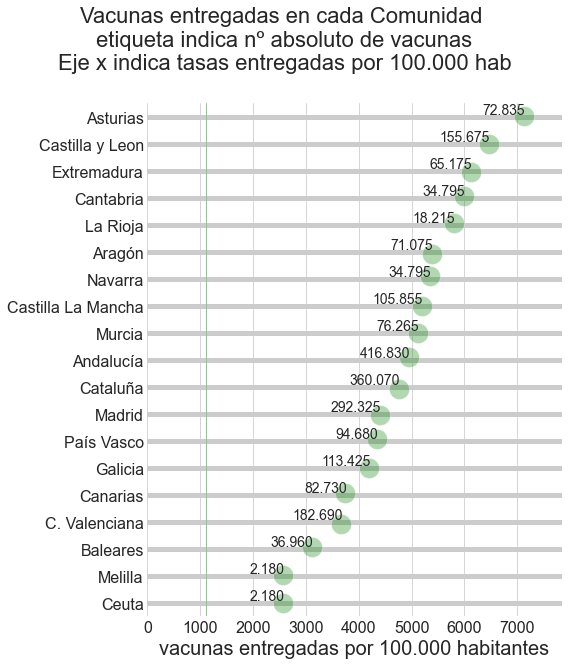

In [12]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title = 'Nº de personas con pauta completa a {}\n linea vertical -> media España'.format(dia[:-3])
title= 'Vacunas entregadas en cada Comunidad \n etiqueta indica nº absoluto de vacunas \nEje x indica tasas entregadas por 100.000 hab'
datos=datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['vacunas_poblacion']=100000*datos['Dosis entregadas']/datos['poblacion']
datos['pauta_poblacion']=100000*datos['Total pauta completada']/datos['poblacion']
colores = sns.color_palette("Greens_r",19)

g = sns.PairGrid(datos.sort_values('vacunas_poblacion',ascending=False),
                 x_vars='vacunas_poblacion', y_vars=["ccaa"],
                 height=8, aspect=1)

# Draw a dot plot using the stripplot function
#g.map(sns.stripplot, size=20, orient="h", jitter=True,
#      palette=colores,linewidth=1,edgecolor='white',alpha=.5)
g.map(sns.stripplot, size=20, orient="h", jitter=True,
      color='green',linewidth=1,edgecolor='white',alpha=.3)


# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, datos['vacunas_poblacion'].max()*1.1), xlabel="", ylabel="")

ax = g.axes.flat[0]
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.0f}'.format(v)))
#ax.set_title(label=title,fontsize=20)
ax.xaxis.grid(True)
ax.yaxis.grid(True,lw=5)
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
#ax.set_xticks([0,0.01,0.02,0.02,0.8,1.0])

y_min,y_max = ax.get_ylim()



#ax.vlines(media,y_min,y_max*.7,color='navy')
ax.axvline(x=media,lw=1,color=color_media)
ax.set_xlabel('vacunas entregadas por 100.000 habitantes',fontsize=20)
ax.set_ylabel('')
#ax.annotate('Media nacional', xy=(media+.01,10), va='center', 
#            xytext=(0.1,10),
#            arrowprops=dict(arrowstyle="->",color=color_media,lw=3),
#            fontsize=20,color=color_media)
#ax.set_title(label=title,fontsize=20)


g.fig.suptitle(title,fontsize=22,y=1.15)
sns.despine(left=True, bottom=True)

#g.fig.subplots_adjust(top=1,bottom=.05) 
g.fig.tight_layout()

ticks_y = ax.get_yticklabels()
for j,i in enumerate(ticks_y):
    #print (i,j.get_position()[0],j.get_position()[1])
    valor='{:,.0f}'.format(datos.loc[datos['ccaa']==i.get_text(),'Dosis entregadas'].values[0])
    if valor!='0':
        ax.text(s=valor.replace(',','.'), 
                x=datos.loc[datos['ccaa']==i.get_text(),'vacunas_poblacion']+20,
                y=i.get_position()[1]-.1,
                horizontalalignment='right',
                fontsize=14)


g.fig.savefig('graficos/entregadas_poblacion_{}{}'.format(today,'.png'),bbox_inches = 'tight',dpi=144)

In [13]:
datos

,date_pub,ccaa,Dosis entregadas Pfizer,Dosis entregadas Moderna,Dosis entregadas,Dosis administradas,% sobre entregadas,Total pauta completada,Última fecha de actualización de datos,Fecha de la ultima vacuna registrada,source_name,source,poblacion,vacunas_poblacion,pauta_poblacion
420,3/2/21,Andalucía,400230.0,16600.0,416830,329258,0.789910,104529.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,8426405,4946.712151,1240.493425
421,3/2/21,Aragón,68175.0,2900.0,71075,61036,0.858755,15157.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1320794,5381.232804,1147.567297
422,3/2/21,Asturias,69935.0,2900.0,72835,61483,0.844141,22227.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1022293,7124.669738,2174.229893
423,3/2/21,Baleares,35460.0,1500.0,36960,26240,0.709957,5262.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1187802,3111.629716,443.003127
424,3/2/21,Canarias,79530.0,3200.0,82730,70794,0.855723,17129.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2207225,3748.145296,776.042316
425,3/2/21,Cantabria,33495.0,1300.0,34795,26718,0.767869,5861.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,581684,5981.770171,1007.591751
426,3/2/21,Castilla y Leon,149475.0,6200.0,155675,132496,0.851106,40565.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2408083,6464.685810,1684.534960
427,3/2/21,Castilla La Mancha,101655.0,4200.0,105855,92702,0.875745,24525.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2035505,5200.429377,1204.860710
428,3/2/21,Cataluña,345770.0,14300.0,360070,273724,0.760197,80387.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,7565099,4759.620462,1062.603411
429,3/2/21,C. Valenciana,175690.0,7000.0,182690,162563,0.889830,58452.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,4974475,3672.548359,1175.038572


<ipython-input-14-17c37c66134a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
<ipython-input-14-17c37c66134a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['vacunas_poblacion']=100000*datos['Dosis entregadas']/datos['poblacion']
<ipython-input-14-17c37c66134a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

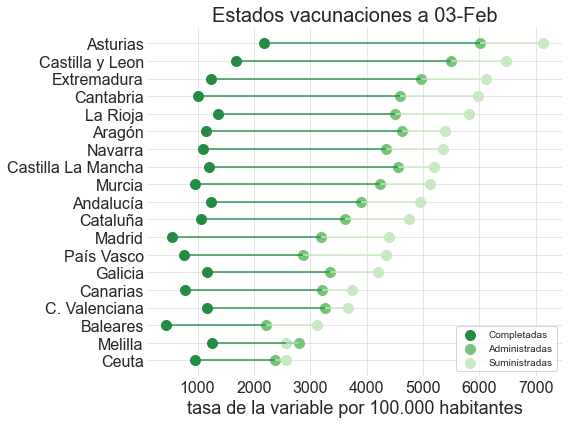

In [14]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title = 'Nº de personas con pauta completa a {}\n linea vertical -> media España'.format(dia[:-3])
title= 'Vacunas entregadas en cada Comunidad \n etiqueta indica nº absoluto de vacunas \nEje x indica tasas entregadas por 100.000 hab'
datos=datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['vacunas_poblacion']=100000*datos['Dosis entregadas']/datos['poblacion']
datos['tasa_administradas']=100000*datos['Dosis administradas']/datos['poblacion']
datos['pauta_poblacion']=100000*datos['Total pauta completada']/datos['poblacion']
datos=datos.sort_values('vacunas_poblacion')

colores = sns.color_palette("Greens_r",3)


my_range=range(1,len(datos.index)+1)
f, ax = plt.subplots(figsize=(8, 6))

ax.hlines(y=my_range, xmin=datos['pauta_poblacion'], xmax=datos['tasa_administradas'], 
          color=colores[0],linewidth=2, alpha=0.7)
ax.hlines(y=my_range, xmin=datos['tasa_administradas'], xmax=datos['vacunas_poblacion'], 
          color=colores[2],linewidth=2, alpha=0.7)
ax.scatter(datos['pauta_poblacion'], my_range, color=colores[0], alpha=1 ,s=100, label='Completadas')
ax.scatter(datos['tasa_administradas'], my_range, color=colores[1], alpha=1 ,s=100, label='Administradas')
ax.scatter(datos['vacunas_poblacion'], my_range, color=colores[2], alpha=1, s=100,label='Suministradas')


ax.legend()
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.set_title('Estados vacunaciones a {}'.format(today),fontsize=20)
ax.set_xlabel('tasa de la variable por 100.000 habitantes',fontsize=18)
plt.yticks(my_range,datos['ccaa'])
ax.grid(True,lw=.5)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)
f.tight_layout()
f.savefig('graficos/suministrada_admin_pauta.png',dpi=100)


/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


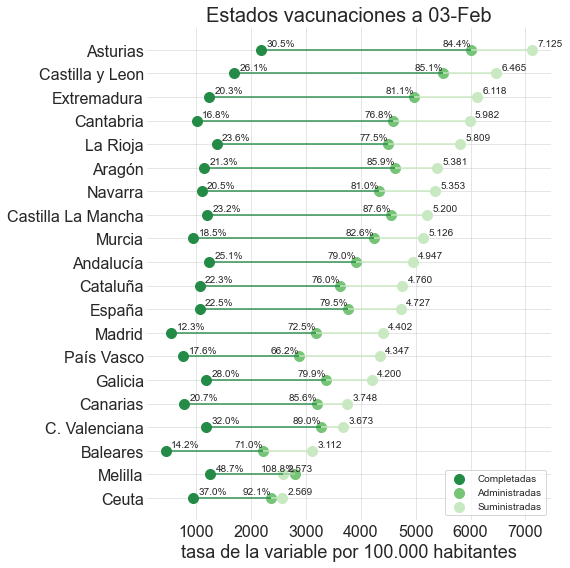

In [15]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title = 'Nº de personas con pauta completa a {}\n linea vertical -> media España'.format(dia[:-3])
title= 'Vacunas entregadas en cada Comunidad \n etiqueta indica nº absoluto de vacunas \nEje x indica tasas entregadas por 100.000 hab'
datos = datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos.loc[:,'poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos.loc[:,'vacunas_poblacion'] = 100000*datos['Dosis entregadas']/datos['poblacion']
datos.loc[:,'tasa_administradas'] = 100000*datos['Dosis administradas']/datos['poblacion']
datos.loc[:,'pauta_poblacion'] = 100000*datos['Total pauta completada']/datos['poblacion']

poblacion_españa = datos['poblacion'].sum()
administradas_españa = datos['Dosis administradas'].sum()
entregadas_españa = datos['Dosis entregadas'].sum()
pautas_españa = datos['Total pauta completada'].sum()
indice_españa=len(datos.index)+1

datos = datos.append({'ccaa':'España',
                      'vacunas_poblacion' : 100000 * entregadas_españa/poblacion_españa,
                      'tasa_administradas' : 100000 * administradas_españa/poblacion_españa,
                      'pauta_poblacion' : 100000 * pautas_españa/poblacion_españa,
                      'Dosis administradas': administradas_españa,
                      'Total pauta completada' : pautas_españa,
                      'Dosis entregadas' : entregadas_españa},
                      ignore_index = True)

datos=datos.sort_values('vacunas_poblacion').copy()


colores_bolas = sns.color_palette("Greens_r",3)


my_range=range(1,len(datos.index)+1)
f, ax = plt.subplots(figsize=(8, 8))

ax.hlines(y=my_range, xmin=datos['pauta_poblacion'], xmax=datos['tasa_administradas'], 
          color=colores[0],linewidth=2, alpha=0.7)
ax.hlines(y=my_range, xmin=datos['tasa_administradas'], xmax=datos['vacunas_poblacion'], 
          color=colores[2],linewidth=2, alpha=0.7)
ax.scatter(datos['pauta_poblacion'], my_range, color=colores_bolas[0], alpha=1 ,s=100, label='Completadas')
ax.scatter(datos['tasa_administradas'], my_range, color=colores_bolas[1], alpha=1 ,s=100, label='Administradas')
ax.scatter(datos['vacunas_poblacion'], my_range, color=colores_bolas[2], alpha=1, s=100,label='Suministradas')

for linea,i in enumerate(datos.index[::]):
    porcentaje_pautas = datos.loc[i,'Total pauta completada']/datos.loc[i,'Dosis entregadas']
    #porcentaje_entregadas = datos.loc[i,'% sobre entregadas']
    porcentaje_entregadas = datos.loc[i,'Dosis administradas']/datos.loc[i,'Dosis entregadas']
    
    ax.text(s='{:0.1%}'.format(porcentaje_pautas).replace(',','.'), 
                x=datos.loc[i,'pauta_poblacion']+100,
                y=linea+1+.15,
                horizontalalignment='left',
                fontsize=10)
    ax.text(s='{:0.1%}'.format(porcentaje_entregadas).replace(',','.'), 
                x=datos.loc[i,'tasa_administradas'],
                y=linea+1+.15,
                horizontalalignment='right',
                fontsize=10)
    ax.text(s='{:0,.0f}'.format(datos.loc[i,'vacunas_poblacion']).replace(',','.'), 
                x=datos.loc[i,'vacunas_poblacion']+100,
                y=linea+1+.15,
                horizontalalignment='left',
                fontsize=10)
    


ax.legend()
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.set_title('Estados vacunaciones a {}'.format(today),fontsize=20)
ax.set_xlabel('tasa de la variable por 100.000 habitantes',fontsize=18)
plt.yticks(my_range,datos['ccaa'])
ax.grid(True,lw=.5)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)
f.tight_layout()
f.savefig('graficos/suministrada_admin_pauta.png',dpi=144)


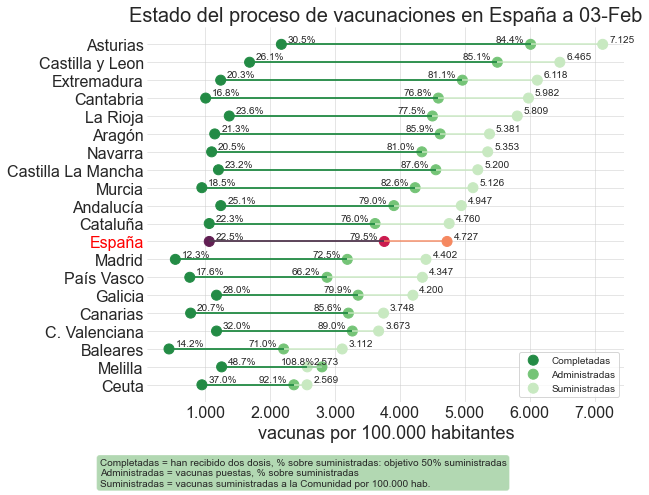

In [16]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title= 'Estado del proceso de vacunaciones en España'
datos = datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos.loc[:,'poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos.loc[:,'vacunas_poblacion'] = 100000*datos['Dosis entregadas']/datos['poblacion']
datos.loc[:,'tasa_administradas'] = 100000*datos['Dosis administradas']/datos['poblacion']
datos.loc[:,'pauta_poblacion'] = 100000*datos['Total pauta completada']/datos['poblacion']

poblacion_españa = datos['poblacion'].sum()
administradas_españa = datos['Dosis administradas'].sum()
entregadas_españa = datos['Dosis entregadas'].sum()
pautas_españa = datos['Total pauta completada'].sum()
indice_españa=len(datos.index)+1

datos = datos.append({'ccaa':'España',
                      'vacunas_poblacion' : 100000 * entregadas_españa/poblacion_españa,
                      'tasa_administradas' : 100000 * administradas_españa/poblacion_españa,
                      'pauta_poblacion' : 100000 * pautas_españa/poblacion_españa,
                      'Dosis administradas': administradas_españa,
                      'Total pauta completada' : pautas_españa,
                      'Dosis entregadas' : entregadas_españa},
                      ignore_index = True)

datos=datos.sort_values('vacunas_poblacion').copy()


colores_bolas = sns.color_palette("Greens_r",3)
colores_rojos = sns.color_palette('rocket',3)
# c = ['green'  if datos.loc[i,'ccaa']!='España' else 'red' for i in datos.index]


my_range=range(1,len(datos.index)+1)
f, ax = plt.subplots(figsize=(9, 7))

ax.hlines(y=my_range, xmin=datos['pauta_poblacion'], xmax=datos['tasa_administradas'], 
          color=colores[0],linewidth=2, alpha=0.7)


c = [colores_bolas[0]  if datos.loc[i,'ccaa']!='España' else colores_rojos[0] for i in datos.index]
ax.scatter(datos['pauta_poblacion'], my_range, color=c, alpha=1 ,s=100, label='Completadas')
ax.hlines(y=my_range, xmin=datos['pauta_poblacion'], xmax=datos['tasa_administradas'], 
          color=c,linewidth=2, alpha=0.7)
c = [colores_bolas[1]  if datos.loc[i,'ccaa']!='España' else colores_rojos[1] for i in datos.index]
ax.scatter(datos['tasa_administradas'], my_range, color=c, alpha=1 ,s=100, label='Administradas')

c = [colores_bolas[2]  if datos.loc[i,'ccaa']!='España' else colores_rojos[2] for i in datos.index]
ax.hlines(y=my_range, xmin=datos['tasa_administradas'], xmax=datos['vacunas_poblacion'], 
          color=c,linewidth=2, alpha=0.7)
ax.scatter(datos['vacunas_poblacion'], my_range, color=c, alpha=1, s=100,label='Suministradas')

for linea,i in enumerate(datos.index[::]):
    porcentaje_pautas = datos.loc[i,'Total pauta completada']/datos.loc[i,'Dosis entregadas']
    #porcentaje_entregadas = datos.loc[i,'% sobre entregadas']
    porcentaje_entregadas = datos.loc[i,'Dosis administradas']/datos.loc[i,'Dosis entregadas']
    ax.text(s='{:0.1%}'.format(porcentaje_pautas).replace(',','.'), 
                x=datos.loc[i,'pauta_poblacion']+100,
                y=linea+1+.15,
                horizontalalignment='left',
                fontsize=10)
    ax.text(s='{:0.1%}'.format(porcentaje_entregadas).replace(',','.'), 
                x=datos.loc[i,'tasa_administradas']-100,
                y=linea+1+.15,
                horizontalalignment='right',
                fontsize=10)
    ax.text(s='{:0,.0f}'.format(datos.loc[i,'vacunas_poblacion']).replace(',','.'), 
                x=datos.loc[i,'vacunas_poblacion']+100,
                y=linea+1+.15,
                horizontalalignment='left',
                fontsize=10)

datos[datos['ccaa']=='']
ax.get_yticklabels()[datos.index.get_loc(datos[datos['ccaa']=='España'].index.values[0])].set_color("red")


ax.legend(loc=4)
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0,color=c)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:,.0f}'.format(v).replace(',','.')))

ax.set_title(title+' a {}'.format(today),fontsize=20)
ax.set_xlabel('vacunas por 100.000 habitantes',fontsize=18)
plt.yticks(my_range,datos['ccaa'])
ax.grid(True,lw=.5)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)

textstr = '\n'.join((
    'Completadas = han recibido dos dosis, % sobre suministradas: objetivo 50% suministradas',
     'Administradas = vacunas puestas, % sobre suministradas',
    'Suministradas = vacunas suministradas a la Comunidad por 100.000 hab.',
    ))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='green', alpha=0.3)

# place a text box in upper left in axes coords .65, .35
ax.text(-.1, -.15, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)


f.tight_layout()
f.savefig('graficos/suministrada_admin_pauta.png',dpi=144)


In [17]:
datos

,date_pub,ccaa,Dosis entregadas Pfizer,Dosis entregadas Moderna,Dosis entregadas,Dosis administradas,% sobre entregadas,Total pauta completada,Última fecha de actualización de datos,Fecha de la ultima vacuna registrada,source_name,source,poblacion,vacunas_poblacion,tasa_administradas,pauta_poblacion
17,3/2/21,Ceuta,1980.0,200.0,2180,2008,0.921101,806.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,84843.0,2569.451811,2366.724420,949.989981
18,3/2/21,Melilla,1980.0,200.0,2180,2372,1.088073,1062.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,84714.0,2573.364497,2800.009444,1253.629860
3,3/2/21,Baleares,35460.0,1500.0,36960,26240,0.709957,5262.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1187802.0,3111.629716,2209.122396,443.003127
9,3/2/21,C. Valenciana,175690.0,7000.0,182690,162563,0.889830,58452.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,4974475.0,3672.548359,3267.942848,1175.038572
4,3/2/21,Canarias,79530.0,3200.0,82730,70794,0.855723,17129.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2207225.0,3748.145296,3207.375777,776.042316
11,3/2/21,Galicia,108925.0,4500.0,113425,90643,0.799145,31725.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2700330.0,4200.412542,3356.737880,1174.856406
16,3/2/21,País Vasco,91080.0,3600.0,94680,62679,0.662009,16621.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2178048.0,4347.011636,2877.760270,763.114495
13,3/2/21,Madrid,280725.0,11600.0,292325,211857,0.724731,35902.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,6640705.0,4402.017557,3190.278743,540.635369
19,NaN,España,NaN,NaN,2218755,1764778,NaN,498978.0,NaN,NaN,NaN,NaN,NaN,4727.331137,3760.077156,1063.134161
8,3/2/21,Cataluña,345770.0,14300.0,360070,273724,0.760197,80387.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,7565099.0,4759.620462,3618.247428,1062.603411


In [18]:
datos

,date_pub,ccaa,Dosis entregadas Pfizer,Dosis entregadas Moderna,Dosis entregadas,Dosis administradas,% sobre entregadas,Total pauta completada,Última fecha de actualización de datos,Fecha de la ultima vacuna registrada,source_name,source,poblacion,vacunas_poblacion,tasa_administradas,pauta_poblacion
17,3/2/21,Ceuta,1980.0,200.0,2180,2008,0.921101,806.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,84843.0,2569.451811,2366.724420,949.989981
18,3/2/21,Melilla,1980.0,200.0,2180,2372,1.088073,1062.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,84714.0,2573.364497,2800.009444,1253.629860
3,3/2/21,Baleares,35460.0,1500.0,36960,26240,0.709957,5262.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1187802.0,3111.629716,2209.122396,443.003127
9,3/2/21,C. Valenciana,175690.0,7000.0,182690,162563,0.889830,58452.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,4974475.0,3672.548359,3267.942848,1175.038572
4,3/2/21,Canarias,79530.0,3200.0,82730,70794,0.855723,17129.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2207225.0,3748.145296,3207.375777,776.042316
11,3/2/21,Galicia,108925.0,4500.0,113425,90643,0.799145,31725.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2700330.0,4200.412542,3356.737880,1174.856406
16,3/2/21,País Vasco,91080.0,3600.0,94680,62679,0.662009,16621.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2178048.0,4347.011636,2877.760270,763.114495
13,3/2/21,Madrid,280725.0,11600.0,292325,211857,0.724731,35902.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,6640705.0,4402.017557,3190.278743,540.635369
19,NaN,España,NaN,NaN,2218755,1764778,NaN,498978.0,NaN,NaN,NaN,NaN,NaN,4727.331137,3760.077156,1063.134161
8,3/2/21,Cataluña,345770.0,14300.0,360070,273724,0.760197,80387.0,NaN,2/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,7565099.0,4759.620462,3618.247428,1062.603411


## Dashboard

In [19]:
datos = datos_row.copy()

In [20]:
datos.loc[:,'ccaa'] = datos.apply(lambda x:'España' if x['ccaa']=='Totales' else x['ccaa'] ,axis=1)

In [21]:
datos.loc[:,'poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)

In [22]:
datos.loc[:,'Tasa entregadas'] = 100000*datos['Dosis entregadas']/datos['poblacion']


In [23]:
datos.loc[:,'Tasa administradas'] = 100000*datos['Dosis administradas']/datos['poblacion']


In [24]:
datos.loc[:,'Tasa pautas'] = 100000*datos['Total pauta completada']/datos['poblacion']


In [25]:
datos['date_pub'] = pd.to_datetime(datos['date_pub'],format='%d/%m/%y')

In [26]:
primer_dia = datos['date_pub'][0]
ultimo_dia = list(datos['date_pub'])[-1]

In [27]:
un_dia=timedelta(days=1)

In [28]:
n_dias = (list(datos['date_pub'])[-1]-datos['date_pub'][0]).days

In [29]:
n_dias

30

Vamos a generar una tabla con los siguientes valores para las tres variables suministradas, administradas y pautas completas:
* valores últimas 24 horas
* valores última semana
* media última semana
* valores desde principio
* desde principio

In [30]:
columnas = ['ccaa','poblacion','Dosis entregadas','Tasa entregadas',
         'Dosis administradas','Tasa administradas',
        'Total pauta completada','Tasa pautas']

In [31]:
columns = pd.MultiIndex.from_product([['Entregadas','Administradas','Pautas'],['Hoy','Semana','Total']])

In [32]:
tabla = pd.DataFrame(columns=columns)

In [33]:
for comunidad in datos['ccaa'].unique():
    ayer = ultimo_dia-un_dia if ultimo_dia.dayofweek!=0 else ultimo_dia-3*un_dia
    entregadas_hoy = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]-datos.loc[(datos['date_pub']==(ayer)) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]
    entregadas_semana = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]-datos.loc[(datos['date_pub']==(ultimo_dia-7*un_dia)) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]
    entregadas_total = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]
    
    administradas_hoy = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]-datos.loc[(datos['date_pub']==(ayer)) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]
    administradas_semana = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]-datos.loc[(datos['date_pub']==(ultimo_dia-7*un_dia)) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]
    administradas_total = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]
    
    pautas_hoy = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]-datos.loc[(datos['date_pub']==(ayer)) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]
    pautas_semana = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]-datos.loc[(datos['date_pub']==(ultimo_dia-7*un_dia)) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]
    pautas_total = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]
    valores=[entregadas_hoy,entregadas_semana,entregadas_total,
        administradas_hoy,administradas_semana,administradas_total,
        pautas_hoy,pautas_semana,pautas_total]
    tabla.loc[comunidad]=valores

In [34]:
tabla

Entregadas                      Administradas            \
                          Hoy    Semana      Total           Hoy    Semana   
Andalucía             85850.0   85850.0   416830.0       15972.0   71282.0   
Aragón                14570.0   14570.0    71075.0        4554.0   13201.0   
Asturias              13400.0   13400.0    72835.0        3306.0   12406.0   
Baleares               6750.0    6750.0    36960.0         277.0    2637.0   
Canarias              17110.0   17110.0    82730.0        3011.0   16141.0   
Cantabria              6650.0    6650.0    34795.0        1651.0    5808.0   
Castilla y Leon       31780.0   31780.0   155675.0        6134.0   28299.0   
Castilla La Mancha    21220.0   21220.0   105855.0        3814.0   24180.0   
Cataluña              74020.0   74020.0   360070.0       12162.0   72074.0   
C. Valenciana         36860.0   36860.0   182690.0       14618.0   54109.0   
Extremadura           13200.0   13200.0    65175.0        3177.0   15090.0   
Galicia               23760.0   23760.0   113425.0        2907.0   17967.0   
La Rioja               3910.0    3910.0    18215.0         903.0    4500.0   
Madrid                59550.0   59550.0   292325.0       12362.0   37763.0   
Murcia                15840.0   15840.0    76265.0        2277.0   12051.0   
Navarra                6650.0    6650.0    34795.0        1420.0    8142.0   
País Vasco            18580.0   18580.0    94680.0        3097.0   11829.0   
Ceuta                     0.0       0.0     2180.0          58.0     179.0   
Melilla                   0.0       0.0     2180.0          24.0     659.0   
España               449700.0  449700.0  2218755.0       91724.0  408317.0   

                                Pautas                      
                        Total      Hoy    Semana     Total  
Andalucía            329258.0  13765.0   53578.0  104529.0  
Aragón                61036.0   4038.0    9297.0   15157.0  
Asturias              61483.0   2724.0    8500.0   22227.0  
Baleares              26240.0    236.0    2148.0    5262.0  
Canarias              70794.0   2482.0   10695.0   17129.0  
Cantabria             26718.0   1600.0    5561.0    5861.0  
Castilla y Leon      132496.0   5514.0   21809.0   40565.0  
Castilla La Mancha    92702.0   3165.0   17543.0   24525.0  
Cataluña             273724.0  10956.0   61961.0   80387.0  
C. Valenciana        162563.0  13473.0   51148.0   58452.0  
Extremadura           52880.0   2426.0   10068.0   13202.0  
Galicia               90643.0   2660.0   17490.0   31725.0  
La Rioja              14118.0    823.0    3617.0    4301.0  
Madrid               211857.0  11590.0   30291.0   35902.0  
Murcia                63008.0   1537.0    6664.0   14117.0  
Navarra               28199.0    828.0    4607.0    7148.0  
País Vasco            62679.0   2562.0    9984.0   16621.0  
Ceuta                  2008.0     58.0     303.0     806.0  
Melilla                2372.0     22.0     648.0    1062.0  
España              1764778.0  80459.0  325912.0  498978.0

In [35]:
def colores(x):
    df = tabla.copy()
    df.loc[:,('Entregadas',slice(None))] = 'color : midnightblue'
    df.loc[:,('Administradas',slice(None))] = 'color : darkviolet'
    df.loc[:,('Pautas',slice(None))] = 'color : darkgreen'
    return df

In [36]:

from IPython.display import HTML

def hover(hover_color="#ffff99"):
    return dict(selector="tr:hover",
                props=[("background-color", "%s" % hover_color)])

styles = [
    dict(selector="th", props=[("font-size", "100%"),
                               ("text-align", "center"),
                               ("color",'black')]),
    dict(selector="caption", props=[("font-size", "200%"),
                                    ("color",'black'),
                                    ("caption-side", "bottom"),
                                    ("text-align", "center")]) ]

estilo_columnas = {
    'Entregadas': [dict(selector='td', props=[('color', 'green')])],
    'Administradas': [dict(selector='td', props=[('color', 'red')])],
    }
html = (tabla.style.set_table_styles(styles)
          .set_properties(**{'color': 'navy',
                           'border-color': 'white'}).format(lambda x: '{:,.0f}'.format(x).replace(',','.')).\
                            set_caption('Valores Vacunación a {} tras {} días de campaña'.format(ultimo_dia.strftime('%d %b'),n_dias)).
        set_table_styles(estilo_columnas,overwrite=False)).apply(colores,axis=None)
html